# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib import style
style.use('seaborn')


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# cities2 = ['touros', 'saint anthony', 'san patricio']

# set up lists to hold reponse info -- append to it in the loop below
name = []
lat = []
long = []
temp = []
wind = []
humid = []
clouds = []
country = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        print(f"Processing record: {city}.")
    except:
        # Append null values
        print(f"City: {city} was mot found. Skipping...")
#         print("City not found skipping")
        pass


Processing record: kapaa.
Processing record: kodiak.
Processing record: bluff.
Processing record: nabire.
City: satitoa was mot found. Skipping...
Processing record: severo-kurilsk.
Processing record: hilo.
Processing record: rikitea.
Processing record: burns lake.
Processing record: punta arenas.
Processing record: georgetown.
Processing record: bredasdorp.
City: perrenjas was mot found. Skipping...
Processing record: arraial do cabo.
Processing record: carahue.
City: ruatoria was mot found. Skipping...
Processing record: kaitangata.
Processing record: chokurdakh.
Processing record: chapais.
Processing record: mataura.
Processing record: svetlogorsk.
Processing record: saky.
Processing record: gainesville.
Processing record: busselton.
Processing record: vaini.
Processing record: dalian.
Processing record: puli.
Processing record: pevek.
Processing record: mchinji.
City: barentsburg was mot found. Skipping...
Processing record: ushuaia.
Processing record: qaanaaq.
Processing record: u

Processing record: plouzane.
Processing record: boa vista.
Processing record: la palma.
Processing record: barao de melgaco.
Processing record: payyannur.
Processing record: tixpehual.
Processing record: ulaangom.
Processing record: marawi.
Processing record: soyo.
Processing record: ballina.
Processing record: antofagasta.
Processing record: namtsy.
Processing record: quelimane.
Processing record: nishihara.
Processing record: lasa.
Processing record: vestmannaeyjar.
Processing record: carutapera.
Processing record: saint george.
Processing record: eyl.
Processing record: boddam.
Processing record: gizo.
Processing record: katobu.
City: jiroft was mot found. Skipping...
Processing record: port augusta.
Processing record: hasaki.
Processing record: nouadhibou.
Processing record: matay.
Processing record: bikin.
Processing record: laguna.
Processing record: komsomolskoye.
Processing record: maceio.
Processing record: ailigandi.
Processing record: boguchany.
Processing record: hofn.
Proc

Processing record: vanimo.
Processing record: rocha.
City: gardan diwal was mot found. Skipping...
Processing record: iranshahr.
Processing record: port hawkesbury.
Processing record: aksarayskiy.
Processing record: moron.
Processing record: cayenne.
Processing record: xinpu.
Processing record: ilulissat.
Processing record: rudbar.
Processing record: sheridan.
Processing record: paramus.
Processing record: warri.
Processing record: khor.
Processing record: ayagoz.
City: kamenskoye was mot found. Skipping...
Processing record: hanmer springs.
Processing record: lisala.
Processing record: coahuayana.
Processing record: rafai.
Processing record: clearwater.
Processing record: santa catarina.
Processing record: kharan.
Processing record: christchurch.
Processing record: omboue.
Processing record: leo.
Processing record: lorengau.
Processing record: wakkanai.
Processing record: cardston.
Processing record: langsa.
Processing record: kenai.
Processing record: aykhal.
Processing record: bainb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp -- dictionary to a pd.DataFrame
weather_dict = {
    "city": name,
    "lat": lat,
    "lon": long,
    "temp": temp,
    "humidity": humid,
    "wind": wind,
    "cloudiness": clouds,
    "country": country
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(100)

,city,lat,lon,temp,humidity,wind,cloudiness,country
0,Kapaa,22.08,-159.32,78.80,78,13.87,1,US
1,Saint Paul Harbor,57.79,-152.41,42.80,87,4.70,75,US
2,Bluff,-46.60,168.33,45.00,72,11.01,76,NZ
3,Nabire,-3.37,135.48,76.55,88,3.00,100,ID
4,Severo-Kuril'sk,50.68,156.12,52.27,73,2.15,91,RU
...,...,...,...,...,...,...,...,...
95,Vitim,59.45,112.56,55.36,81,3.02,0,RU
96,Cape Town,-33.93,18.42,55.99,82,16.11,75,ZA
97,Port Hardy,50.70,-127.42,59.00,93,2.24,90,CA
98,Huilong,31.81,121.66,78.01,82,10.47,0,CN


In [8]:
weather_data.to_csv('Datafolder/weather_data_df.csv', index=False)

In [10]:
weather_html = weather_data.replace('\n', '')
weather_html.to_html('weather_data_html.html')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.dtypes

city           object
lat           float64
lon           float64
temp          float64
humidity        int64
wind          float64
cloudiness      int64
country        object
dtype: object

In [12]:
#  Get the indices of cities that have humidity over 100%.
ind_humidity = weather_data.index[weather_data["humidity"]>100]
ind_humidity

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
                            
# No observations with Humidity over 100

In [14]:
# Extract relevant fields from the data frame
#no need as there was nothing cleaned up

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

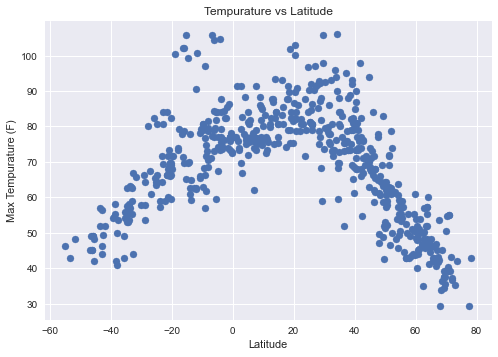

In [15]:
style.use('seaborn')

## Convert to floats and store Latitude and Tempurature as x and y values
x_values = weather_data['lat']
y_values = weather_data['temp']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Tempurature (F)')
plt.title('Tempurature vs Latitude')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

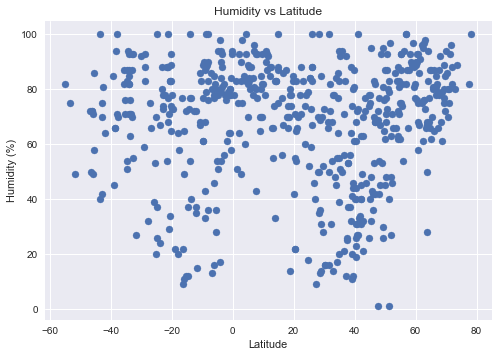

In [16]:
## Convert to floats and store Latitude and Humidty as x and y values
x_values = weather_data['lat']
y_values = weather_data['humidity']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

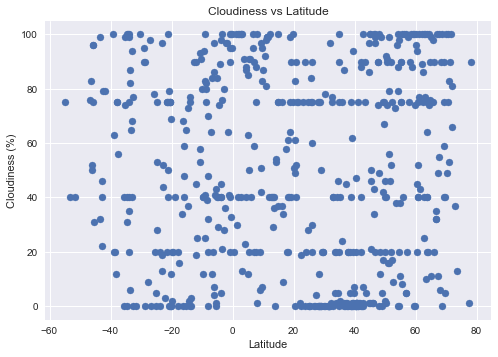

In [17]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = weather_data['lat']
y_values = weather_data['cloudiness']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

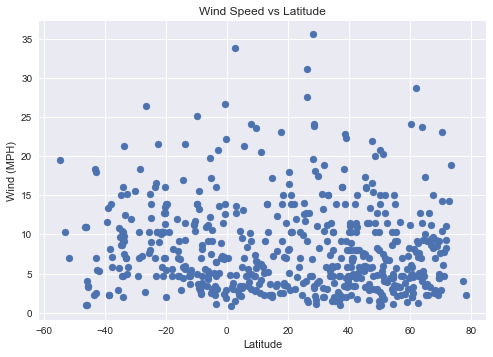

In [18]:
## Convert to floats and store Latitude and wind as x and y values
x_values = weather_data['lat']
y_values = weather_data['wind']

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Wind Speed vs Latitude')

# Show plot
plt.show()